In [2]:
import json
import os

# drive à importer : https://drive.google.com/drive/folders/1vn_RM47LA_HdpQwZqdwqNRPm7CXyeeV3?usp=sharing
# 
#1 chargement des datas

#Nous allons tester la classification binaire 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
###WhisperX

#whisperX 
folder_path_whisperX_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/ad"
folder_path_whisperX_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/cn"

#whisperX with segmented 30sec audios length
folder_path_whisperX_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/ad"
folder_path_whisperX_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/cn"

#whisperX with segmented 30sec audios length and whistespaces representation 
folder_path_whisperX_ad_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_ad"
folder_path_whisperX_cn_ws_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX_seg/white_spaces_cn"

#whisperX with whistespaces representation 
folder_path_whisperX_ad_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_ad"
folder_path_whisperX_cn_ws = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisperX/white_spaces_cn"

###Whisper classic
folder_path_whisper_ad = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/ad"
folder_path_whisper_cn = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper/cn"

###Whisper classic with segmented 30sec audios length
folder_path_whisper_ad_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/ad"
folder_path_whisper_cn_seg = "/content/drive/MyDrive/Alzheimer_transcripts/transcriptions/whisper_seg/cn"

In [4]:
def from_json_to_dict(folder_ad, folder_cn):
    data_ad = []
    data_cn = []
    for dir_path in [folder_ad, folder_cn]:
        for file_name in os.listdir(dir_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(dir_path, file_name)
                with open(file_path, 'r') as f:
                    data = json.load(f)
                    if dir_path == folder_ad:
                        data_ad.append(data)
                    elif dir_path == folder_cn:
                        data_cn.append(data)
    return data_ad, data_cn             

                
whisperX_data_ad, whisperX_data_cn = from_json_to_dict(folder_path_whisperX_ad, folder_path_whisperX_cn)
whisperX_seg_data_ad, whisperX_seg_data_cn = from_json_to_dict(folder_path_whisperX_ad_seg, folder_path_whisperX_cn_seg)
whisperX_seg_ws_data_ad, whisperX_seg_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws_seg, folder_path_whisperX_cn_ws_seg)
whisperX_ws_data_ad, whisperX_ws_data_cn = from_json_to_dict(folder_path_whisperX_ad_ws, folder_path_whisperX_cn_ws)

whisper_seg_data_ad, whisper_seg_data_cn = from_json_to_dict(folder_path_whisper_ad_seg, folder_path_whisper_cn_seg)
whisper_data_ad, whisper_data_cn = from_json_to_dict(folder_path_whisper_ad, folder_path_whisper_cn)

In [5]:
#delete des keys autre que 'text'
keys_to_keep = ['text']

def delete_keys(d, keys_to_keep):
    for key in list(d.keys()):
        if key not in keys_to_keep:
            del d[key]

for data in (whisperX_data_ad + whisperX_data_cn + \
             whisperX_seg_data_ad + whisperX_seg_data_cn + \
             whisperX_seg_ws_data_ad + whisperX_seg_ws_data_cn +\
             whisperX_ws_data_ad + whisperX_ws_data_cn +\
             whisper_seg_data_ad + whisper_seg_data_cn +\
             whisper_data_ad + whisper_data_cn):
    delete_keys(data, keys_to_keep)

In [6]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.5 MB/s eta 0:00:00


In [33]:
import pandas as pd
import seaborn as sns
from transformers import BertTokenizer
import matplotlib.pyplot as plt
sns.set_theme()


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def get_and_plot_stats(data_ad,data_cn,title):
  counts_ad = []
  for text in data_ad:
    counts_ad.append(len(tokenizer(text["text"])["input_ids"]))
  counts_cn = [] 
  for text in data_cn:
    counts_cn.append(len(tokenizer(text["text"])["input_ids"]))
  plt.hist([counts_ad, counts_cn], color=['r','b'],label=["ad","cn"],alpha=0.5)
  plt.xlabel("Number of token per example")
  plt.title(title)
  plt.legend()
  return {"ad" : counts_ad, "cn" : counts_cn}


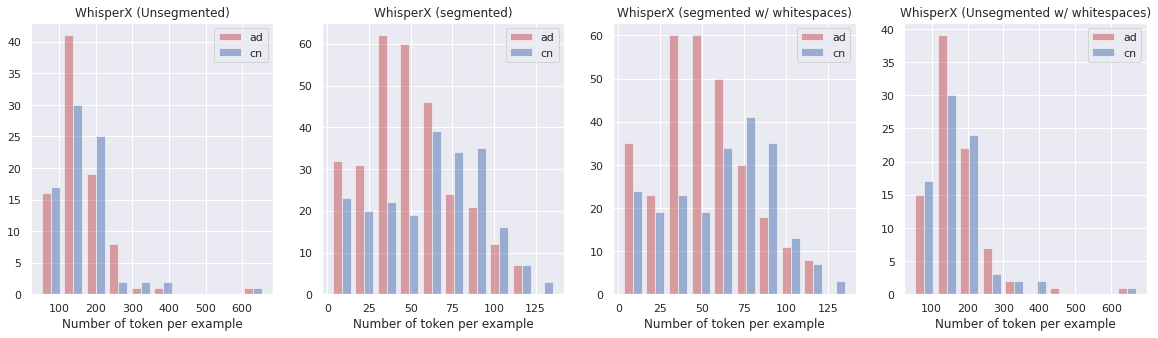

In [31]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
stats_whisperX = get_and_plot_stats(whisperX_data_ad,whisperX_data_cn,"WhisperX (Unsegmented)")
plt.subplot(1,4,2)
stats_whisperX_seg = get_and_plot_stats(whisperX_seg_data_ad,whisperX_seg_data_cn,"WhisperX (segmented)")
plt.subplot(1,4,3)
stats_whisperX_seg_ws = get_and_plot_stats(whisperX_seg_ws_data_ad,whisperX_seg_ws_data_cn,"WhisperX (segmented w/ whitespaces)")
plt.subplot(1,4,4)
stats_whisperX_ws = get_and_plot_stats(whisperX_ws_data_ad,whisperX_ws_data_cn,"WhisperX (Unsegmented w/ whitespaces)")

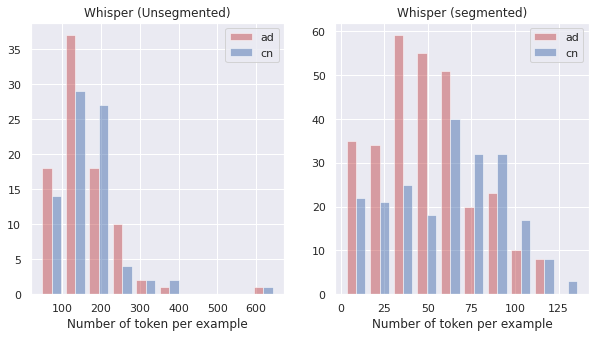

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
stats_whisper = get_and_plot_stats(whisper_data_ad,whisper_data_cn,"Whisper (Unsegmented)")
plt.subplot(1,2,2)
stats_whisper_seg = get_and_plot_stats(whisper_seg_data_ad,whisper_seg_data_cn,"Whisper (segmented)")

In [51]:
def describe(stats):
  ad = pd.Series(stats["ad"])
  print("ad :")
  print(ad.describe(), "\n")
  cn = pd.Series(stats["cn"])
  print("cn :")
  print(cn.describe(), "\n")

In [52]:
print("=========WhisperX===========")
describe(stats_whisperX)
print("=========WhisperX (seg)===========")
describe(stats_whisperX_seg)
print("=========WhisperX (seg + whitespaces)===========")
describe(stats_whisperX_seg_ws)
print("=========WhisperX (whitespaces)===========")
describe(stats_whisperX_ws)
print("=========Whisper===========")
describe(stats_whisper)
print("=========Whisper (seg)===========")
describe(stats_whisper_seg)


=========WhisperX===========
ad :
count     87.000000
mean     163.586207
std       80.452868
min       68.000000
25%      116.000000
50%      149.000000
75%      186.000000
max      661.000000
dtype: float64 

cn :
count     79.000000
mean     165.886076
std       84.307129
min       46.000000
25%      113.500000
50%      154.000000
75%      196.500000
max      625.000000
dtype: float64 

=========WhisperX (seg)===========
ad :
count    295.00000
mean      50.00000
std       26.85689
min        2.00000
25%       32.00000
50%       49.00000
75%       66.50000
max      123.00000
dtype: float64 

cn :
count    218.000000
mean      61.293578
std       31.170795
min        4.000000
25%       35.000000
50%       67.000000
75%       84.000000
max      137.000000
dtype: float64 

=========WhisperX (seg + whitespaces)===========
ad :
count    295.000000
mean      50.420339
std       26.854602
min        2.000000
25%       32.000000
50%       50.000000
75%       66.000000
max      122.000000
dt